In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [5]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
print(df.columns)

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [15]:
import warnings
warnings.filterwarnings('ignore')
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


In [17]:
linkage_matrix = linkage(X_scaled, method='ward')
df['Hierarchical_Cluster'] = fcluster(linkage_matrix, t=3, criterion='maxclust')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster,Hierarchical_Cluster
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,0,1
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,0,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,2
196,197,Female,45,126,28,2,1
197,198,Male,32,126,74,1,2
198,199,Male,32,137,18,1,1


In [19]:
kmeans_silhouette = silhouette_score(X_scaled, df['KMeans_Cluster'])
hierarchical_silhouette = silhouette_score(X_scaled, df['Hierarchical_Cluster'])
print(f"KMeans Silhouette Score: {kmeans_silhouette:.3f}")
print(f"Hierarchical Silhouette Score: {hierarchical_silhouette:.3f}")

KMeans Silhouette Score: 0.358
Hierarchical Silhouette Score: 0.321


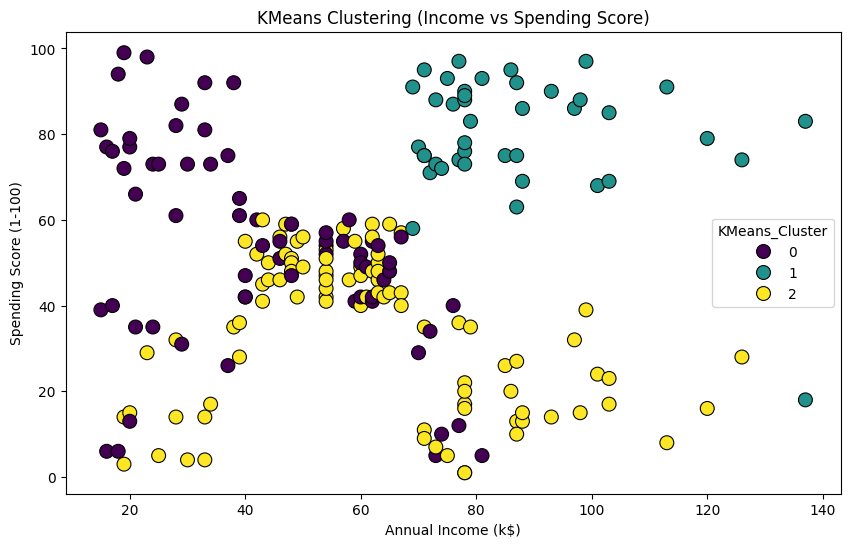

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], 
                hue=df['KMeans_Cluster'], palette='viridis', s=100, edgecolor='k')
plt.title("KMeans Clustering (Income vs Spending Score)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

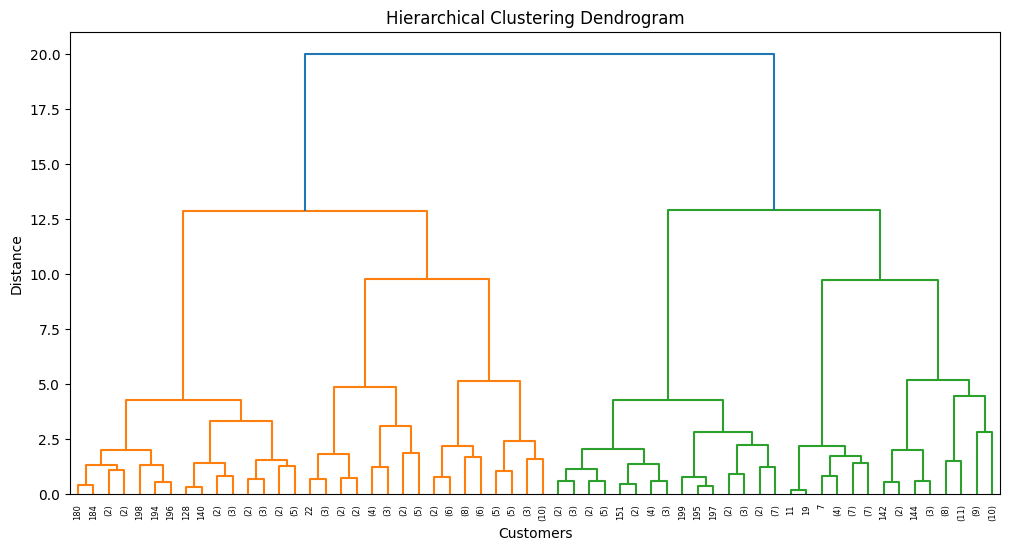

In [23]:
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()


In [25]:
print("Cluster Descriptions:")
for cluster in sorted(df['KMeans_Cluster'].unique()):
    segment = df[df['KMeans_Cluster'] == cluster]
    print(f"Cluster {cluster}: Age Mean = {segment['Age'].mean():.1f}, "
          f"Income Mean = {segment['Annual Income (k$)'].mean():.1f}, "
          f"Spending Score Mean = {segment['Spending Score (1-100)'].mean():.1f}")

Cluster Descriptions:
Cluster 0: Age Mean = 25.8, Income Mean = 42.8, Spending Score Mean = 53.6
Cluster 1: Age Mean = 32.9, Income Mean = 87.3, Spending Score Mean = 80.0
Cluster 2: Age Mean = 51.3, Income Mean = 61.8, Spending Score Mean = 34.2


In [33]:
print("Customer segmentation completed and saved!")

Customer segmentation completed and saved!
